In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve

# Step 1: Get the image from the drive
img = Image.open("/content/drive/MyDrive/data4you/W2_D5/W2_D5_notebooks/grayscale_cat.jpg")
# Convert image to numpy array
img_array = np.array(img)
print(img_array)


[[  6   4   6 ...  54  79 102]
 [  6   6   5 ...  51  78 102]
 [  5   8   7 ...  51  82 103]
 ...
 [ 36  35  34 ...  73  76  75]
 [ 34  35  35 ...  73  76  77]
 [ 38  37  35 ...  74  76  75]]


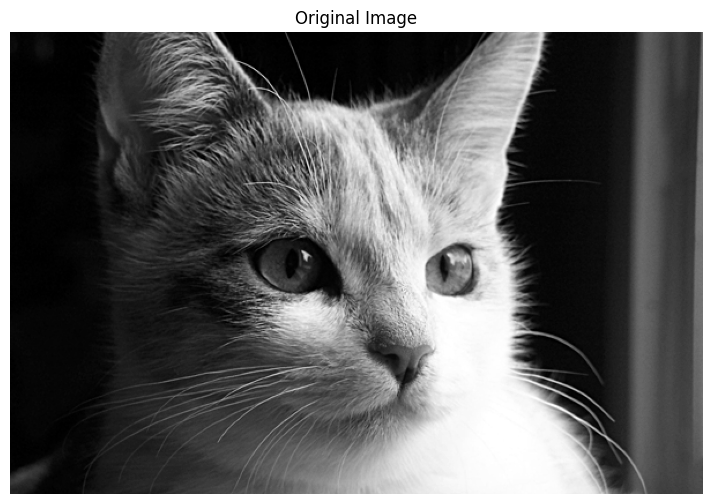

In [43]:
# Step 2: Plot the original image
plt.figure(figsize=(12, 6))
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')
# Show the plots
plt.show()

In [44]:
# Step 3: Define an averaging kernel for blurring and apply convolution
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9
blurred_img_array = convolve(img_array, kernel)


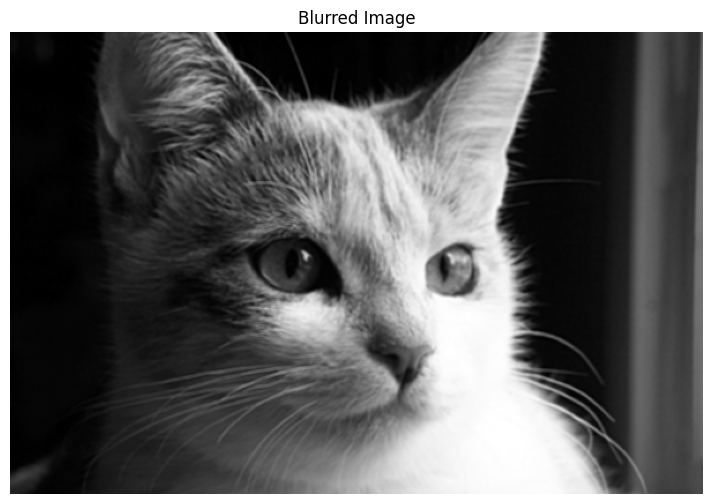

In [45]:
# Step 4: Plot the blurred image
plt.figure(figsize=(12, 6))
plt.title("Blurred Image")
plt.imshow(blurred_img_array, cmap='gray')
plt.axis('off')
# Show the plots
plt.show()

Now, create a kernel ( the matrix that acts on the image) that will increase the blurring.
Then, show the image.

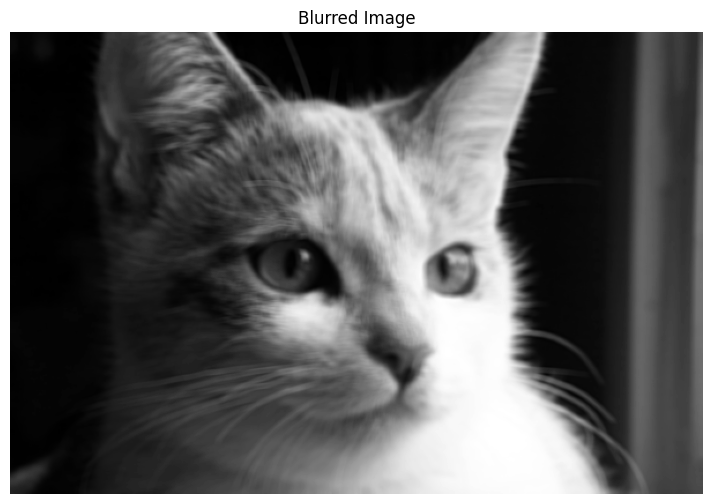

In [46]:
# Step 3: Define an averaging kernel for blurring and apply convolution
kernel = np.array([[1, 1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1, 1]]) / 36
blurred_img_array = convolve(img_array, kernel)
# Step 4: Plot the blurred image
plt.figure(figsize=(12, 6))
plt.title("Blurred Image")
plt.imshow(blurred_img_array, cmap='gray')
plt.axis('off')
# Show the plots
plt.show()

We manually entered the matrix. Can you create the kernel matrix in a more consise way?

Hint: use numpy ones function.



In [47]:
# Define a 5x5 averaging kernel
kernel = np.ones((5, 5)) / 25  # Each element is 1/25 for averaging
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Now lets apply different kinds of kernel - blur, edge, emboss

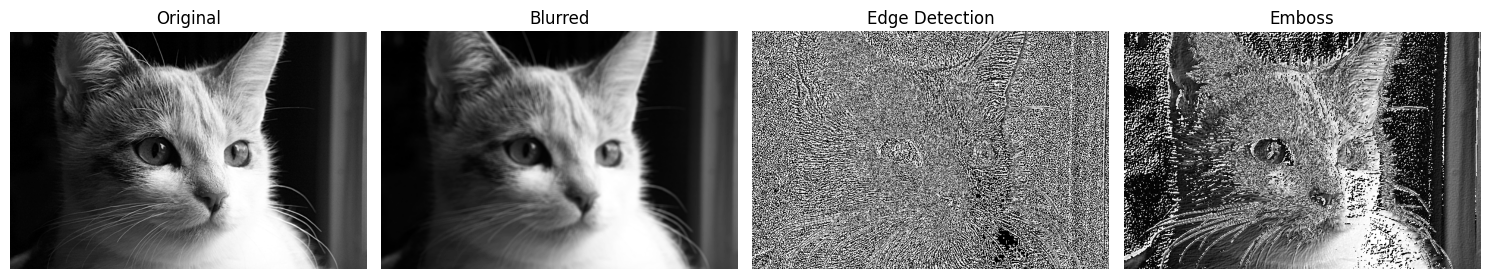

In [49]:
# Define kernels for blurring, edge detection, and embossing
blur_kernel = np.ones((5, 5)) / 25
edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])
emboss_kernel = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])

# Apply convolution with each kernel
blurred_img = convolve(img_array, blur_kernel)
edge_img = convolve(img_array, edge_kernel)
emboss_img = convolve(img_array, emboss_kernel)

# Plot the original and filtered images side by side
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img_array, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(blurred_img, cmap='gray')
axes[1].set_title('Blurred')
axes[2].imshow(edge_img, cmap='gray')
axes[2].set_title('Edge Detection')
axes[3].imshow(emboss_img, cmap='gray')
axes[3].set_title('Emboss')

# Remove axis ticks for a cleaner display
for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()
